In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style("ticks")

## Compare tip attributes

Count the number of tips present at non-zero frequency in the "no delay" analysis compared to the number of tips with "ideal" and "realistic" delays. Additionally, compare the frequencies of tips that are present in the latter two analyses with the "no delay" analysis.

In [3]:
no_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_no_delay_with_bias/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [4]:
ideal_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_ideal_delay_with_bias/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [5]:
realistic_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_realistic_delay_with_bias/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [6]:
no_delay_tips.head()

,strain,timepoint,frequency
0,sample_3236_14,2016-10-01,0.000013
1,sample_3236_17,2016-10-01,0.000013
2,sample_3236_19,2016-10-01,0.000013
3,sample_3236_21,2016-10-01,0.000013
4,sample_3236_22,2016-10-01,0.000013


In [7]:
tips = no_delay_tips.merge(
    ideal_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_ideal"],
).merge(
    realistic_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_realistic"],
)  

In [8]:
tips.head(10)

,strain,timepoint,frequency,frequency_ideal,frequency_realistic
0,sample_3236_14,2016-10-01,0.000013,0.000022,0.00005
1,sample_3236_17,2016-10-01,0.000013,0.000022,0.00005
2,sample_3236_19,2016-10-01,0.000013,0.000022,0.00005
3,sample_3236_21,2016-10-01,0.000013,0.000022,0.00005
4,sample_3236_22,2016-10-01,0.000013,0.000022,0.00005
5,sample_3236_32,2016-10-01,0.000013,0.000022,0.00005
6,sample_3236_35,2016-10-01,0.000013,0.000022,0.00005
7,sample_3236_39,2016-10-01,0.000013,0.000022,0.00005
8,sample_3236_43,2016-10-01,0.000013,0.000022,0.00005
9,sample_3236_44,2016-10-01,0.000013,0.000022,0.00005


In [9]:
total_tips_no_delay = sum(~pd.isnull(tips["frequency"]))

In [10]:
total_tips_no_delay

61397

In [11]:
total_tips_ideal_delay = sum(~pd.isnull(tips["frequency_ideal"]))

In [12]:
total_tips_ideal_delay

50969

In [13]:
total_tips_ideal_delay / total_tips_no_delay

0.8301545678127595

In [14]:
total_tips_realistic_delay = sum(~pd.isnull(tips["frequency_realistic"]))

In [15]:
total_tips_realistic_delay

33441

In [16]:
total_tips_realistic_delay / total_tips_no_delay

0.544668306269036

In [17]:
tips = tips.fillna(0.0)

In [18]:
max_frequency = tips.loc[:, ["frequency", "frequency_ideal", "frequency_realistic"]].max().max()

In [19]:
max_frequency_threshold = max_frequency + (max_frequency / 10)

In [20]:
x = y = np.linspace(0, max_frequency_threshold, 10)

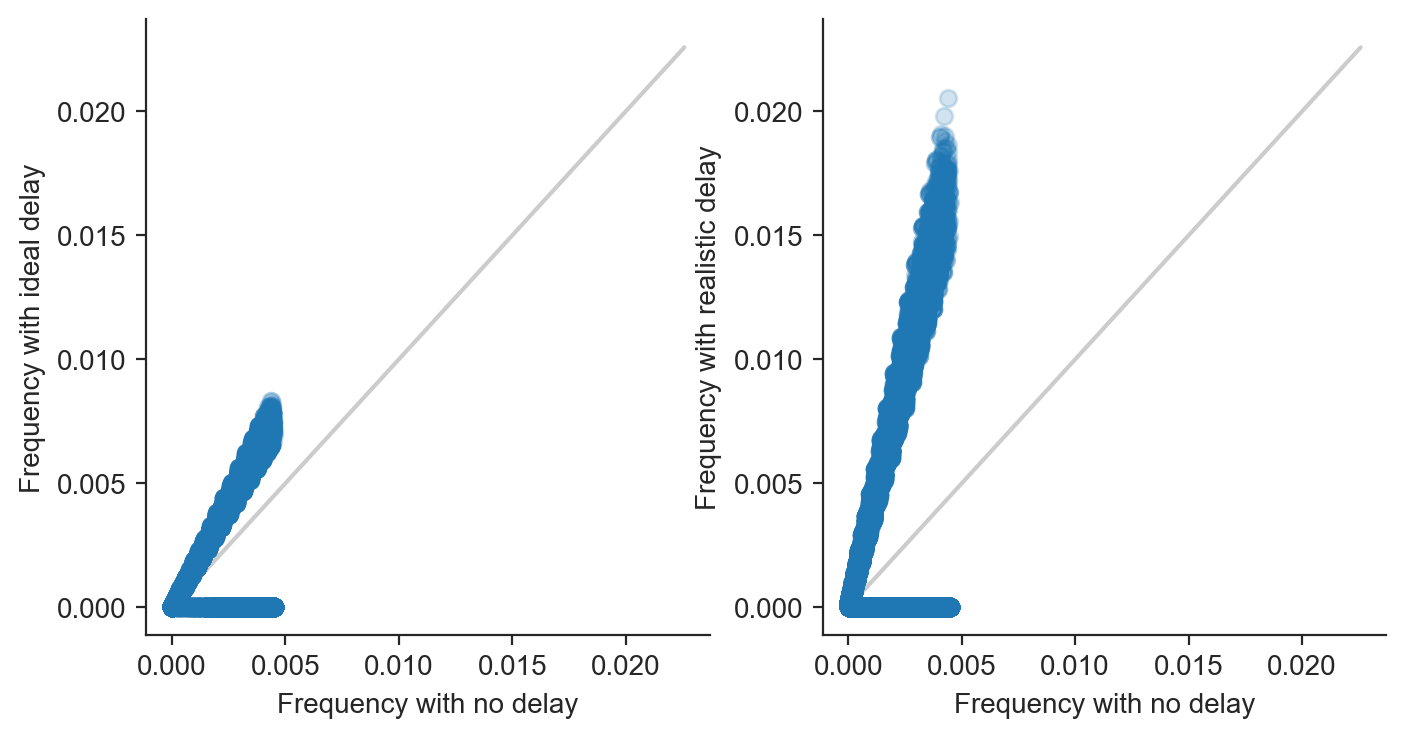

In [21]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    tips["frequency"],
    tips["frequency_ideal"],
    "o",
    alpha=0.2,
)

axes[0].plot(
    x,
    y,
    color="#CCCCCC",
    zorder=-10,
)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[1].plot(
    tips["frequency"],
    tips["frequency_realistic"],
    "o",
    alpha=0.2,
)

axes[1].plot(
    x,
    y,
    color="#CCCCCC",
    zorder=-10,
)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with realistic delay")

sns.despine()

## Compare distances

Compare the model distances between the estimated and observed future populations when the estimated populations depend on different data delay conditions. We expect that the "no delay" scenario will be closer to the true future on average followed by the "ideal" and then the "realistic" conditions.

In [22]:
distances = pd.read_csv("../results/distance_model_errors.tsv", sep="\t", parse_dates=["validation_timepoint"])

In [23]:
distances = distances.rename(columns={"validation_timepoint": "timepoint"})

In [24]:
sample_to_delay_type = {
    "simulated_no_delay_with_bias": "none",
    "simulated_ideal_delay_with_bias": "ideal",
    "simulated_realistic_delay_with_bias": "realistic",
    "h3n2_no_delay": "none",
    "h3n2_ideal_delay": "ideal",
    "h3n2_observed_delay": "observed",
}

In [25]:
distances["delay_type"] = distances["sample"].map(sample_to_delay_type)

In [26]:
distances.loc[:, ["timepoint", "future_timepoint", "delta_month"]].query("future_timepoint < '2020-10-01'").head(20)

,timepoint,future_timepoint,delta_month
0,2016-10-01,2017-01-01,3
1,2017-01-01,2017-04-01,3
2,2017-04-01,2017-07-01,3
3,2017-07-01,2017-10-01,3
4,2017-10-01,2018-01-01,3
5,2018-01-01,2018-04-01,3
6,2018-04-01,2018-07-01,3
7,2018-07-01,2018-10-01,3
8,2018-10-01,2019-01-01,3
9,2019-01-01,2019-04-01,3


In [27]:
distances["sample"].drop_duplicates()

0              simulated_no_delay_with_bias
378     simulated_realistic_delay_with_bias
756         simulated_ideal_delay_with_bias
1134                          h3n2_no_delay
1264                    h3n2_observed_delay
1394                       h3n2_ideal_delay
Name: sample, dtype: object

In [28]:
distances

,delta_month,error_type,future_timepoint,null_validation_error,optimal_validation_error,predictors,sample,type,validation_error,validation_n,timepoint,delay_type
0,3,test,2017-01-01,5.553232,1.894294,normalized_fitness,simulated_no_delay_with_bias,simulated,3.752716,630,2016-10-01,none
1,3,test,2017-04-01,5.088997,1.701399,normalized_fitness,simulated_no_delay_with_bias,simulated,3.570265,630,2017-01-01,none
2,3,test,2017-07-01,5.065559,1.663309,normalized_fitness,simulated_no_delay_with_bias,simulated,3.360436,630,2017-04-01,none
3,3,test,2017-10-01,4.150845,1.734301,normalized_fitness,simulated_no_delay_with_bias,simulated,3.414185,643,2017-07-01,none
4,3,test,2018-01-01,3.972371,1.761232,normalized_fitness,simulated_no_delay_with_bias,simulated,3.175727,630,2017-10-01,none
...,...,...,...,...,...,...,...,...,...,...,...,...
1519,12,test,2018-10-01,5.804018,1.843315,ne_star-lbi,h3n2_ideal_delay,natural,5.262413,1057,2017-10-01,ideal
1520,12,test,2019-01-01,5.274279,2.202706,ne_star-lbi,h3n2_ideal_delay,natural,3.506170,956,2018-01-01,ideal
1521,12,test,2019-04-01,8.420650,2.246137,ne_star-lbi,h3n2_ideal_delay,natural,9.191301,1103,2018-04-01,ideal
1522,12,test,2019-07-01,9.745239,2.945642,ne_star-lbi,h3n2_ideal_delay,natural,12.565832,1109,2018-07-01,ideal


In [29]:
distances.loc[:, ["timepoint", "delta_month", "sample", "validation_error"]]

,timepoint,delta_month,sample,validation_error
0,2016-10-01,3,simulated_no_delay_with_bias,3.752716
1,2017-01-01,3,simulated_no_delay_with_bias,3.570265
2,2017-04-01,3,simulated_no_delay_with_bias,3.360436
3,2017-07-01,3,simulated_no_delay_with_bias,3.414185
4,2017-10-01,3,simulated_no_delay_with_bias,3.175727
...,...,...,...,...
1519,2017-10-01,12,h3n2_ideal_delay,5.262413
1520,2018-01-01,12,h3n2_ideal_delay,3.506170
1521,2018-04-01,12,h3n2_ideal_delay,9.191301
1522,2018-07-01,12,h3n2_ideal_delay,12.565832


In [30]:
distances.groupby(["sample" ,"delay_type", "delta_month"])["validation_error"].mean()

sample                               delay_type  delta_month
h3n2_ideal_delay                     ideal       3              2.839912
                                                 6              4.214660
                                                 9              5.287974
                                                 12             6.188244
h3n2_no_delay                        none        3              2.778028
                                                 6              4.199311
                                                 9              5.303781
                                                 12             6.234448
h3n2_observed_delay                  observed    3              3.306760
                                                 6              4.546556
                                                 9              5.595314
                                                 12             6.524995
simulated_ideal_delay_with_bias      ideal       3             

In [31]:
distances.groupby(["sample", "delay_type", "delta_month"])["validation_error"].median().sort_values()

sample                               delay_type  delta_month
h3n2_no_delay                        none        3              2.680279
h3n2_ideal_delay                     ideal       3              2.683802
h3n2_observed_delay                  observed    3              3.031304
simulated_no_delay_with_bias         none        3              3.490938
h3n2_ideal_delay                     ideal       6              3.717975
h3n2_no_delay                        none        6              3.840991
simulated_ideal_delay_with_bias      ideal       3              4.167199
h3n2_observed_delay                  observed    6              4.412245
h3n2_no_delay                        none        9              4.677797
simulated_no_delay_with_bias         none        6              4.701989
h3n2_ideal_delay                     ideal       9              4.720793
simulated_realistic_delay_with_bias  realistic   3              4.725190
h3n2_observed_delay                  observed    9             

## Simulated populations

In [32]:
simulated_distances = distances[distances["sample"].str.contains("simulated")].copy()

In [33]:
simulated_distances["sample"].drop_duplicates()

0             simulated_no_delay_with_bias
378    simulated_realistic_delay_with_bias
756        simulated_ideal_delay_with_bias
Name: sample, dtype: object

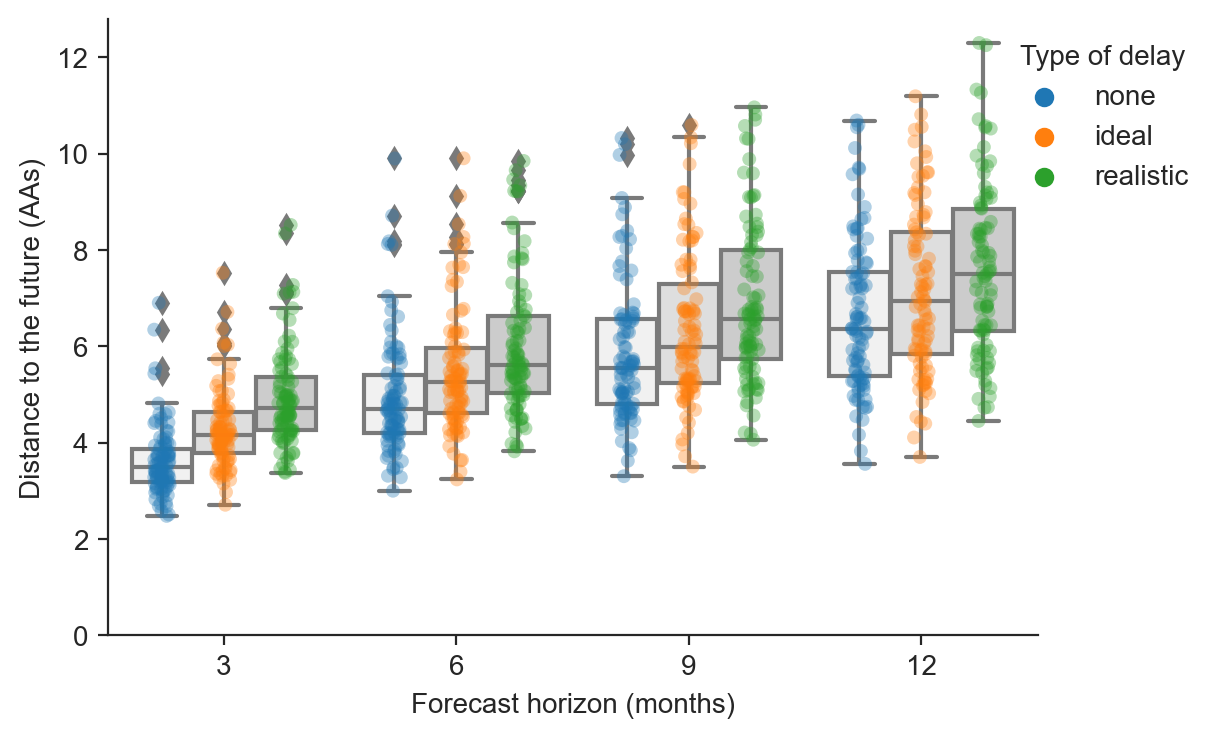

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=simulated_distances,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    data=simulated_distances,
    hue_order=("none", "ideal", "realistic"),
    alpha=0.35,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to the future (AAs)")

sns.despine()

In [35]:
status_quo_distances = simulated_distances.query("(delta_month == 12) & (delay_type == 'realistic')").loc[:, ["future_timepoint", "validation_error"]]

In [36]:
scenario_1_distances = distances.query("(delta_month == 6) & (delay_type == 'realistic')").loc[:, ["future_timepoint", "validation_error"]]
scenario_1_distances = scenario_1_distances.merge(
    status_quo_distances,
    on="future_timepoint",
    suffixes=["", "_current"]
)
scenario_1_distances["reduced_distance"] = scenario_1_distances["validation_error_current"] - scenario_1_distances["validation_error"]

In [37]:
scenario_1_distances.head()

,future_timepoint,validation_error,validation_error_current,reduced_distance
0,2017-10-01,5.569528,7.951117,2.381589
1,2018-01-01,5.057021,4.957896,-0.099125
2,2018-04-01,4.493297,4.908941,0.415644
3,2018-07-01,4.565854,5.289130,0.723276
4,2018-10-01,4.795436,5.815812,1.020376


In [38]:
scenario_2_distances = distances.query("(delta_month == 12) & (delay_type == 'ideal')").loc[:, ["future_timepoint", "validation_error"]]
scenario_2_distances = scenario_2_distances.merge(
    status_quo_distances,
    on="future_timepoint",
    suffixes=["", "_current"]
)
scenario_2_distances["reduced_distance"] = scenario_2_distances["validation_error_current"] - scenario_2_distances["validation_error"]

In [39]:
scenario_3_distances = distances.query("(delta_month == 6) & (delay_type == 'ideal')").loc[:, ["future_timepoint", "validation_error"]]
scenario_3_distances = scenario_3_distances.merge(
    status_quo_distances,
    on="future_timepoint",
    suffixes=["", "_current"]
)
scenario_3_distances["reduced_distance"] = scenario_3_distances["validation_error_current"] - scenario_3_distances["validation_error"]

In [40]:
bins = np.arange(
    0,
    max([
        scenario_1_distances["reduced_distance"].max(),
        scenario_2_distances["reduced_distance"].max(),
        scenario_3_distances["reduced_distance"].max(),
    ]) + 1,
    0.5
)

In [41]:
bins

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5])

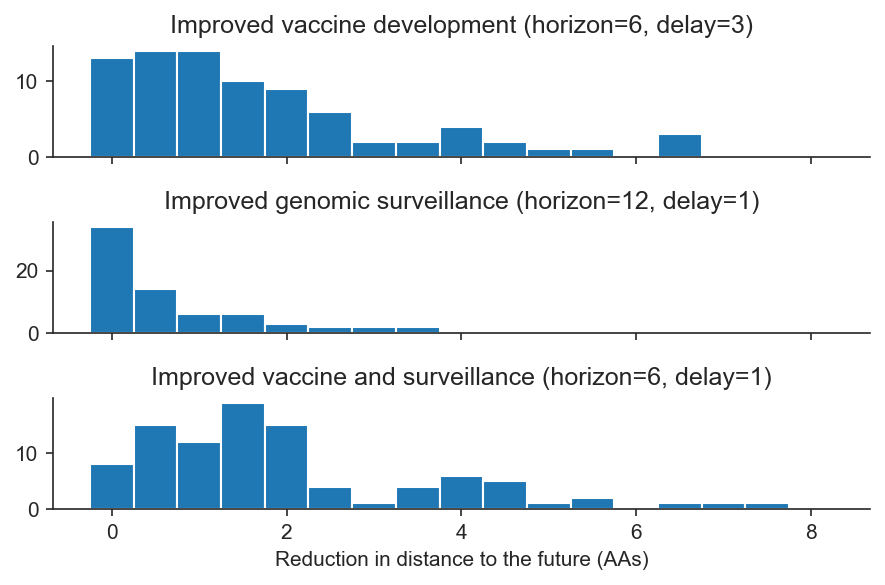

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4), dpi=150, sharex=True)
all_axes = axes.flatten()

ax1 = all_axes[0]
ax1.hist(
    scenario_1_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax1.set_title("Improved vaccine development (horizon=6, delay=3)")

ax2 = all_axes[1]
ax2.hist(
    scenario_2_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax2.set_title("Improved genomic surveillance (horizon=12, delay=1)")

ax3 = all_axes[2]
ax3.hist(
    scenario_3_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax3.set_xlabel("Reduction in distance to the future (AAs)")

ax3.set_title("Improved vaccine and surveillance (horizon=6, delay=1)")

plt.tight_layout()
sns.despine()

In [43]:
scenario_1_distances["reduced_distance"].mean()

1.606812556584676

In [44]:
scenario_2_distances["reduced_distance"].mean()

0.2849360657673256

In [45]:
scenario_3_distances["reduced_distance"].mean()

2.0114656546536613

In [46]:
scenario_1_distances["reduced_distance"].mean() + scenario_2_distances["reduced_distance"].mean()

1.8917486223520017

## Posterior predictive simulations

In [50]:
posterior = pd.read_csv("../results/simulation_posterior_predictive_simulations.csv")

In [51]:
delay_to_type = {
    0: "none",
    1: "ideal",
    3: "realistic",
}

In [52]:
posterior["delay_type"] = posterior["delay"].map(delay_to_type)

In [53]:
posterior

,horizon,delay,distance,delay_type
0,3,0,4.631363,none
1,3,0,4.689128,none
2,3,0,3.437223,none
3,3,0,5.423306,none
4,3,0,3.707360,none
...,...,...,...,...
11995,12,3,7.629716,realistic
11996,12,3,7.988950,realistic
11997,12,3,8.354493,realistic
11998,12,3,8.851768,realistic


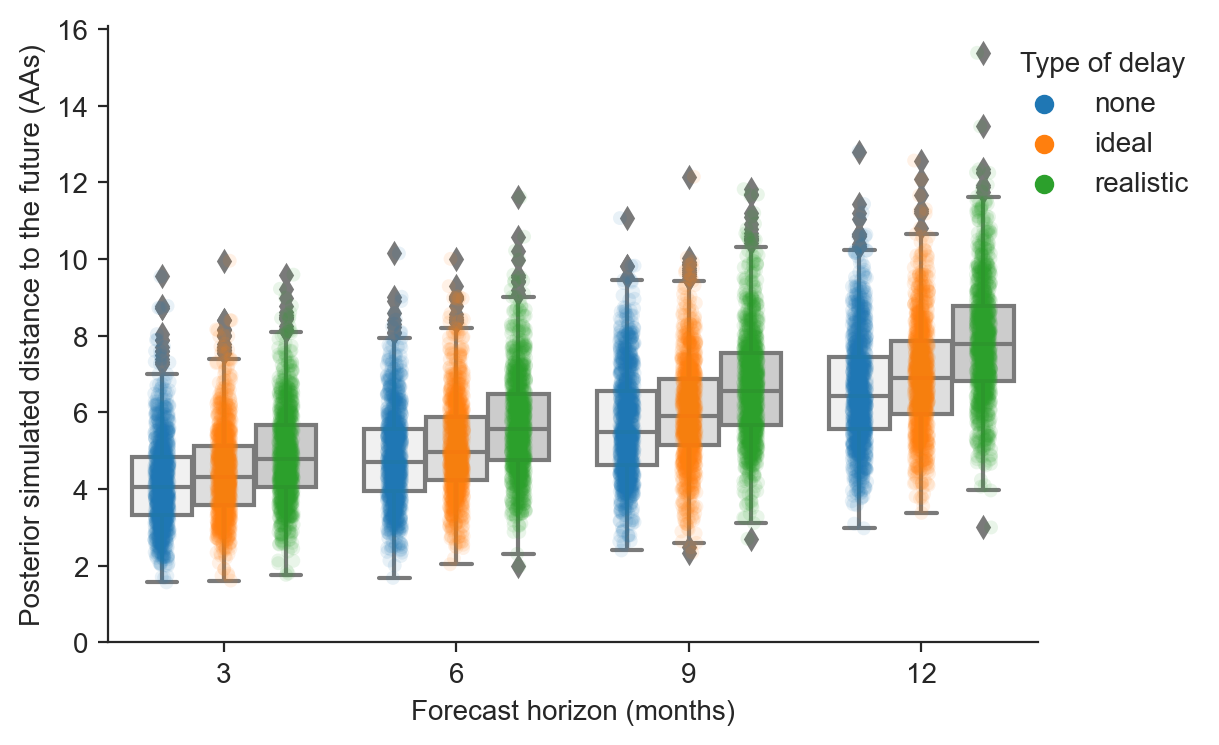

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="horizon",
    y="distance",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=posterior,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="horizon",
    y="distance",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=posterior,
    alpha=0.1,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Posterior simulated distance to the future (AAs)")

sns.despine()

## Relative improvements

In [55]:
improvements = pd.read_csv("../results/simulation_improvements.csv")

In [57]:
improvements

,id,scenario,improvement,title
0,1,"Improved vaccine development (6-month horizon,...",1.478152,"Improved vaccine development (6-month horizon,..."
1,1,"Improved vaccine development (6-month horizon,...",1.946373,"Improved vaccine development (6-month horizon,..."
2,1,"Improved vaccine development (6-month horizon,...",5.427876,"Improved vaccine development (6-month horizon,..."
3,1,"Improved vaccine development (6-month horizon,...",3.171905,"Improved vaccine development (6-month horizon,..."
4,1,"Improved vaccine development (6-month horizon,...",5.774825,"Improved vaccine development (6-month horizon,..."
...,...,...,...,...
29995,3,Improved vaccine and surveillance (6-month hor...,4.089752,Improved vaccine and surveillance (6-month hor...
29996,3,Improved vaccine and surveillance (6-month hor...,2.076367,Improved vaccine and surveillance (6-month hor...
29997,3,Improved vaccine and surveillance (6-month hor...,1.675873,Improved vaccine and surveillance (6-month hor...
29998,3,Improved vaccine and surveillance (6-month hor...,2.950685,Improved vaccine and surveillance (6-month hor...


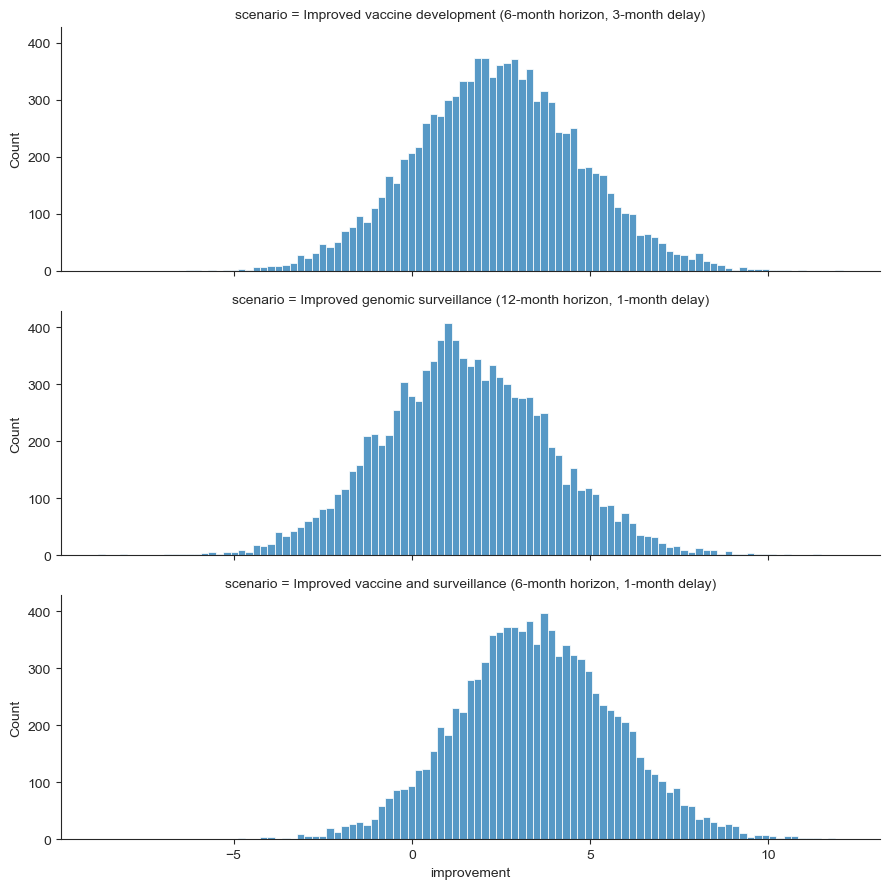

In [184]:
sns.displot(
    data=improvements,
    x="improvement",
    row="scenario",
    height=3,
    aspect=3
)

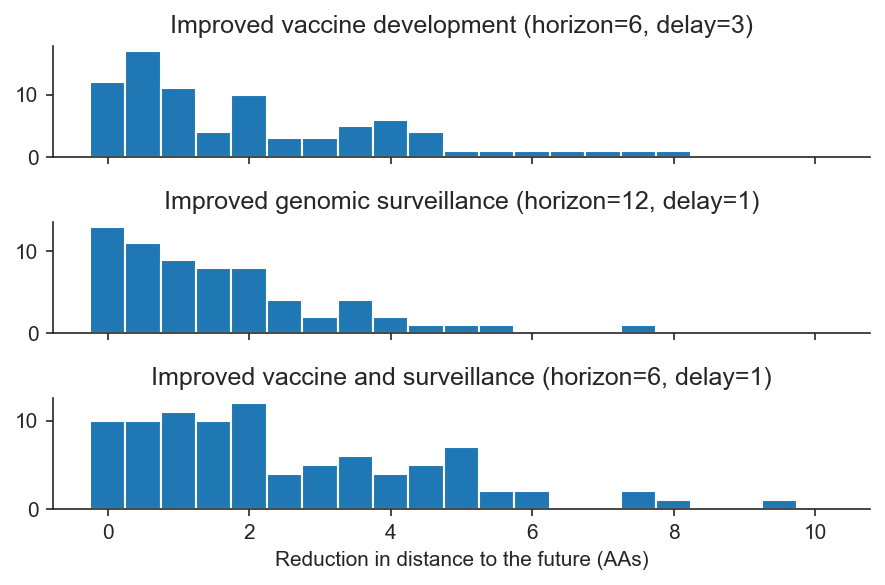

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4), dpi=150, sharex=True)
all_axes = axes.flatten()

ax1 = all_axes[0]
ax1.hist(
    scenario_1_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax1.set_title("Improved vaccine development (horizon=6, delay=3)")

ax2 = all_axes[1]
ax2.hist(
    scenario_2_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax2.set_title("Improved genomic surveillance (horizon=12, delay=1)")

ax3 = all_axes[2]
ax3.hist(
    scenario_3_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax3.set_xlabel("Reduction in distance to the future (AAs)")

ax3.set_title("Improved vaccine and surveillance (horizon=6, delay=1)")

plt.tight_layout()
sns.despine()

## Natural populations

In [47]:
natural_distances = distances[distances["sample"].str.contains("h3n2_")].copy()

In [48]:
natural_distances.shape

(390, 12)

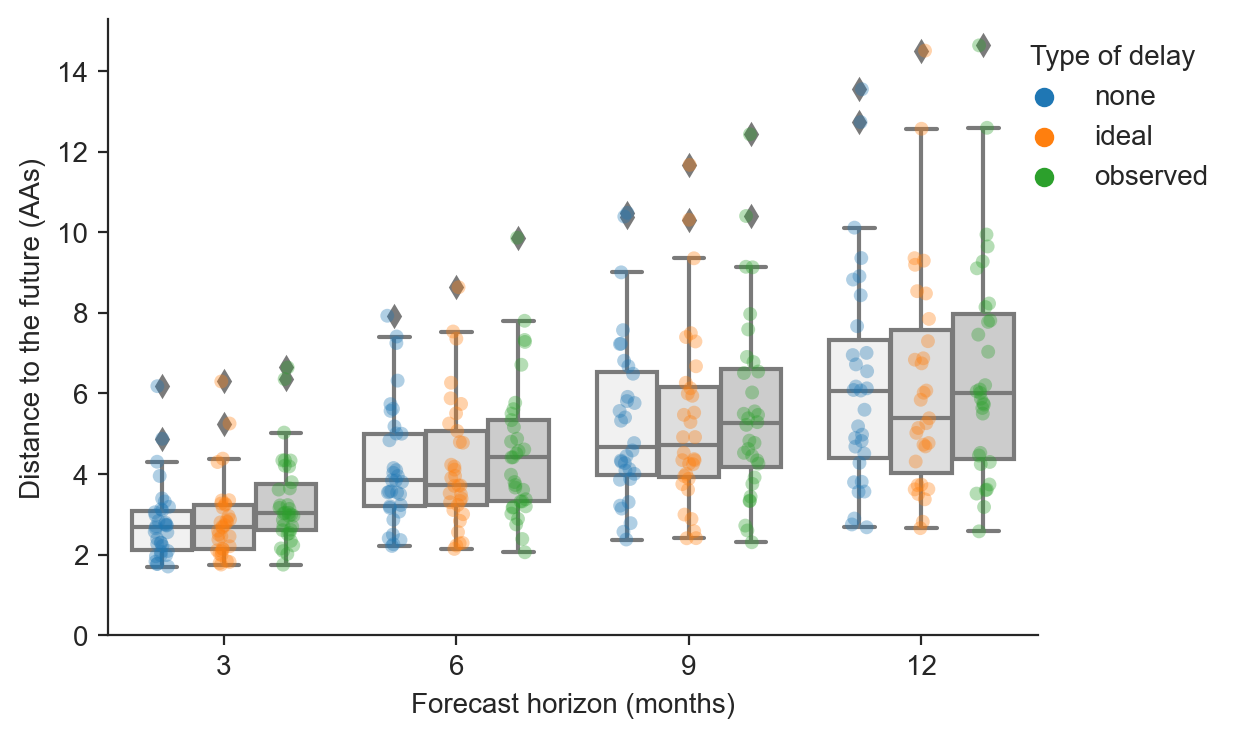

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    hue_order=("none", "ideal", "observed"),
    data=natural_distances,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    data=natural_distances,
    hue_order=("none", "ideal", "observed"),
    alpha=0.35,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to the future (AAs)")

sns.despine()